# Project 4: customer clustering using credit card data

## Introduction
- For this Project we are trying to help a marketing agenecy prepare a a tarageted marketing plan using credit card data
- We need to classify the data into certain sections to discover which type of customers will be low to high net worth and save resoures with this data.

In [4]:
# import packages

import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# import data
orignalCreditCardData=pd.read_csv("CC General.csv")

In [6]:
# Look inside data
print(orignalCreditCardData.dtypes)
print(orignalCreditCardData.columns)
orignalCreditCardData.head()

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object
Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
  

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
# count how many null values we have
orignalCreditCardData.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

<AxesSubplot:>

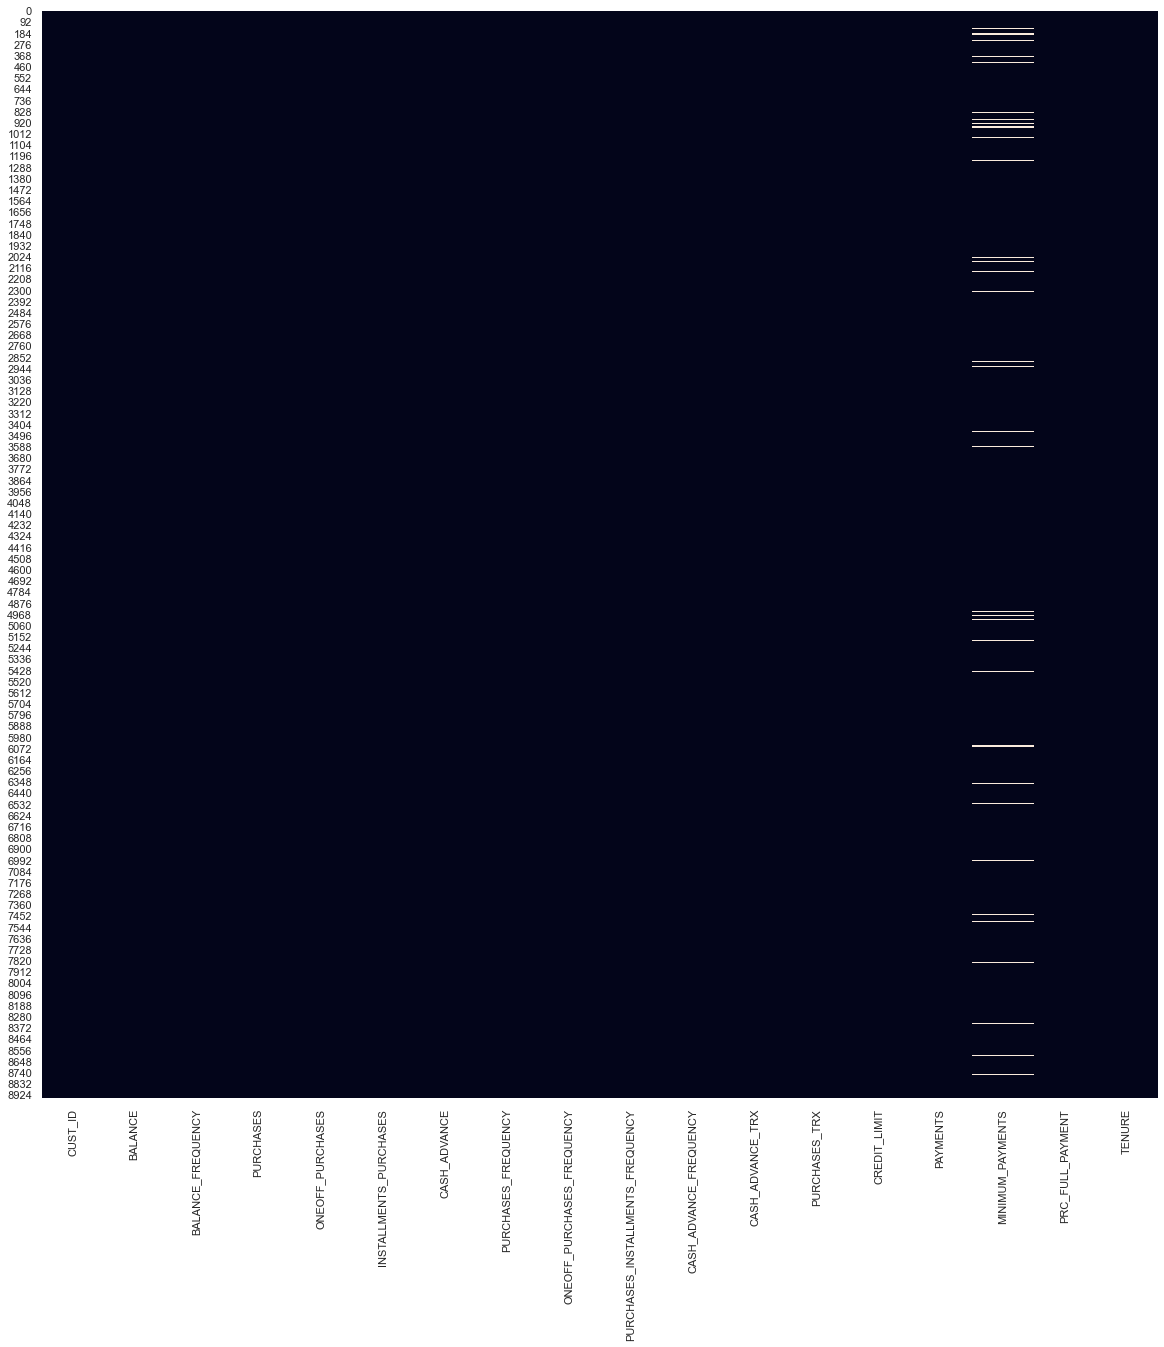

In [8]:
# ploting each columns null values
sns.set(rc={'figure.figsize':(20,20)} )
sns.heatmap(orignalCreditCardData.isnull(), cbar=False)



In [17]:
# Need to deal with null values in minimum_payments:

secondDataset=orignalCreditCardData

for i in ["MINIMUM_PAYMENTS","CREDIT_LIMIT"]:
    secondDataset[i]=secondDataset[i].fillna(0)




In [18]:
#Checks again if we have null values in our dataset
secondDataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

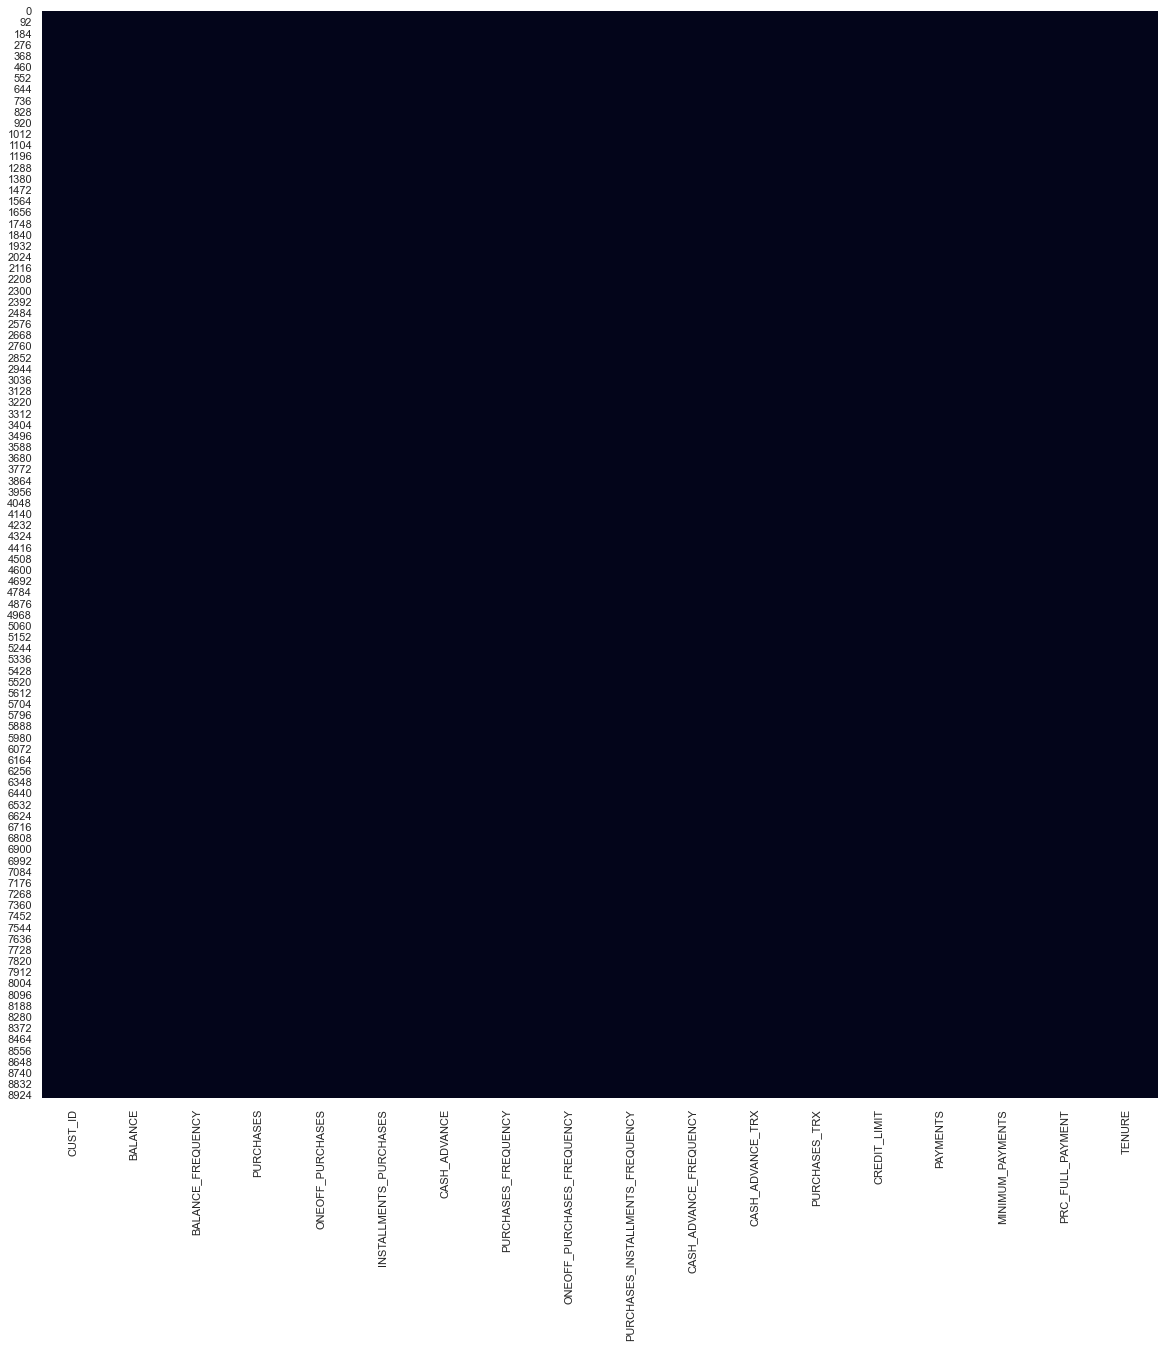

In [19]:
## graph the information to make sure we have  no null values

sns.heatmap(orignalCreditCardData.isnull(), cbar=False)

Nice we got red of all the null values and replaced them with zeros, now its time to try of classifcation algorithms

In [20]:
# create ratio dataset and scaler
from sklearn.preprocessing import StandardScaler



X = secondDataset[["BALANCE", "CREDIT_LIMIT"]]

scaler = StandardScaler()

X_transformed = scaler.fit_transform(X)




In [21]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 7)

model.fit(X_transformed)

KMeans(n_clusters=7)

In [22]:
labels = model.labels_
print(labels)

[0 4 4 ... 0 0 0]


In [23]:
# Centers
centers = model.cluster_centers_
centers_transformed = scaler.inverse_transform(centers)
print(scaler.inverse_transform(centers))

[[  432.35465492  1911.45436656]
 [ 6828.26511673 10661.08597285]
 [ 1970.74527785  3051.44927536]
 [ 1043.4401407  14172.24137931]
 [ 3924.87599118  6944.67584209]
 [  533.82319849  6783.92899199]
 [11350.56644944 15632.4742268 ]]


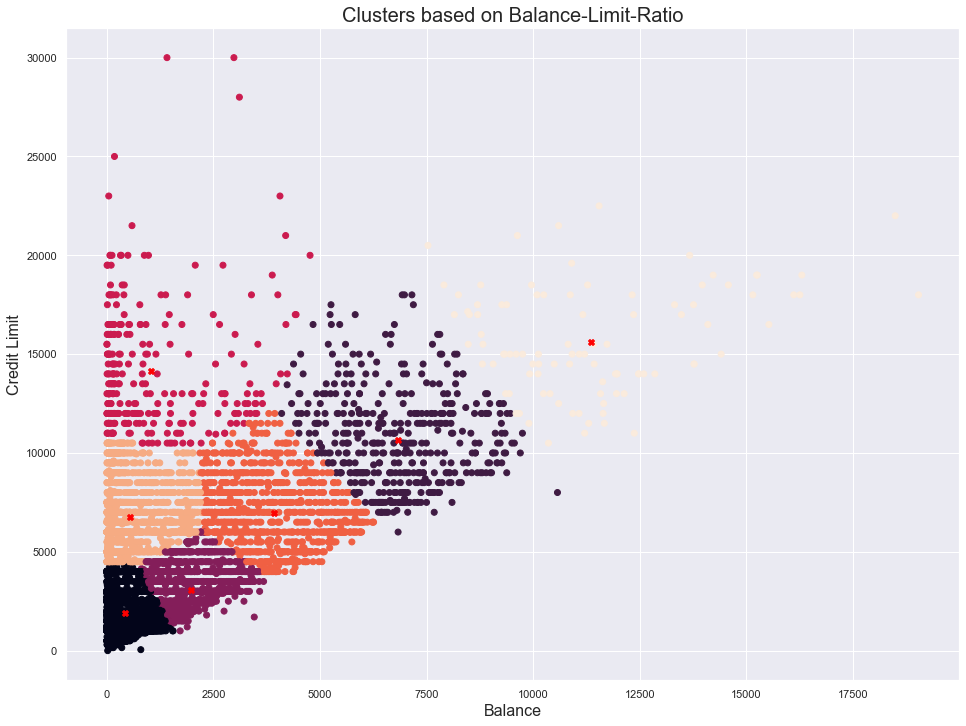

In [24]:
# Plots the clusters
plt.figure(figsize = (16, 12))
plt.title("Clusters based on Balance-Limit-Ratio", fontsize = 20)
plt.scatter(secondDataset["BALANCE"], secondDataset["CREDIT_LIMIT"], c = labels)
plt.scatter(centers_transformed[:, 0], centers_transformed[:, 1], c = "red", marker = "X")
plt.xlabel("Balance", fontsize = 16)
plt.ylabel("Credit Limit", fontsize = 16)
plt.show()

## balance and credit limit plot

-  IN the work above we  decided to use the relationship between credit limit and balance and see how many cluster exist  in our data
- in the aboce we see that the data does follow a linear relationship with most of the data.
- there are some outlier with credit limit being high while having no balance
-  The graphs need to be scales because credit limit does not go up to 20k 